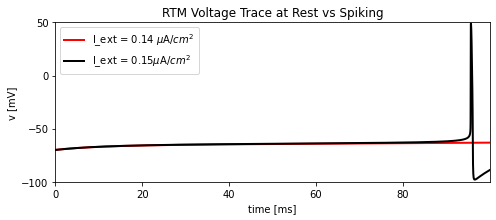

In [86]:
from scipy.integrate import odeint
import numpy as np
from numpy import exp
import pylab as pl

c = 1
g_k = 80
g_na = 100
g_l = 0.1
v_k = -100
v_na = 50
v_l = -67
i_ext = 0.14
t_final = 100
dt = 0.01


def alpha_h(v):
    return 0.128 * exp(-(v + 50.0) / 18.0)


def alpha_m(v):
    return 0.32 * (v + 54) / (1.0 - exp(-(v + 54.0) / 4.0))


def alpha_n(v):
    return 0.032 * (v + 52) / (1.0 - exp(-(v + 52.0) / 5.0))


def beta_h(v):
    return 4.0 / (1.0 + exp(-(v + 27.0) / 5.0))


def beta_m(v):
    return 0.28 * (v + 27.0) / (exp((v + 27.0) / 5.0) - 1.0)


def beta_n(v):
    return 0.5 * exp(-(v + 57.0) / 40.0)


def h_inf(v):
    return alpha_h(v) / (alpha_h(v) + beta_h(v))


def m_inf(v):
    return alpha_m(v) / (alpha_m(v) + beta_m(v))


def n_inf(v):
    return alpha_n(v) / (alpha_n(v) + beta_n(v))


def reduced(u, t):
    '''
    define Traub Model
    '''
    v, n, h, = u
    m = alpha_m(v)/(alpha_m(v) + beta_m(v))
    dv = i_ext - g_na * h * m ** 3 * \
        (v - v_na) - g_k * n ** 4 * (v - v_k) - g_l * (v - v_l)
    
    #dm = alpha_m(v) * (1.0 - m) - beta_m(v) * m
    dn = alpha_n(v) * (1.0 - n) - beta_n(v) * n
    dh = alpha_h(v) * (1.0 - h) - beta_h(v) * h

    #return [dv, dm, dn, dh]
    return [dv, dn, dh]

# def nonreduced(u, t):
#     v, m, n, h = u
    
#     dv = i_ext - g_na * h * m ** 3 * \
#         (v - v_na) - g_k * n ** 4 * (v - v_k) - g_l * (v - v_l)
#     dm = alpha_m(v) * (1.0 - m) - beta_m(v) * m
#     dn = alpha_n(v) * (1.0 - n) - beta_n(v) * n
#     dh = alpha_h(v) * (1.0 - h) - beta_h(v) * h
#     return [dv, dm ,dn, dh]

def reduced_1(u0, t):
    '''
    define Traub Model
    '''
    v, n, h, = u0
    m = alpha_m(v)/(alpha_m(v) + beta_m(v))
    dv = 0.15 - g_na * h * m ** 3 * \
        (v - v_na) - g_k * n ** 4 * (v - v_k) - g_l * (v - v_l)
    
    #dm = alpha_m(v) * (1.0 - m) - beta_m(v) * m
    dn = alpha_n(v) * (1.0 - n) - beta_n(v) * n
    dh = alpha_h(v) * (1.0 - h) - beta_h(v) * h

    #return [dv, dm, dn, dh]
    return [dv, dn, dh]

def reduced_2(u1, t):
    '''
    define Traub Model
    '''
    v, n, h, = u1
    m = alpha_m(v)/(alpha_m(v) + beta_m(v))
    dv = 1.5 - g_na * h * m ** 3 * \
        (v - v_na) - g_k * n ** 4 * (v - v_k) - g_l * (v - v_l)
    
    #dm = alpha_m(v) * (1.0 - m) - beta_m(v) * m
    dn = alpha_n(v) * (1.0 - n) - beta_n(v) * n
    dh = alpha_h(v) * (1.0 - h) - beta_h(v) * h

    #return [dv, dm, dn, dh]
    return [dv, dn, dh]

v = -70.0
m = m_inf(v)
h = h_inf(v)
n = n_inf(v)
u0 = [v, n, h]
u = [v, n, h]
u1 = [v, n, h]

if __name__ == "__main__":

    t = np.arange(0, t_final, dt)
    sol = odeint(reduced, u, t)
    v = sol[:, 0]
    sol_1 = odeint(reduced_1, u0 , t)
    v_1 = sol_1[:,0]
    sol_2 = odeint(reduced_2, u1, t)
    v_2 = sol_2[:,0]
    pl.figure(figsize=(7, 3))
    pl.plot(t, v, lw=2, c="red", label='I_ext = 0.14 $\mu$A/$cm^2$')
    pl.plot(t, v_1, lw=2, c='black', label='I_ext = 0.15$\mu$A/$cm^2$')
    #pl.plot(t, v_2, lw=2, c='green', label='I_ext = 1.5')
    pl.xlim(min(t), max(t))
    pl.ylim(-100, 50)
    pl.xlabel("time [ms]")
    pl.ylabel("v [mV]")
    pl.yticks(range(-100, 100, 50))
    pl.tight_layout()
    pl.title('RTM Voltage Trace at Rest vs Spiking')
    pl.legend()
    pl.show()



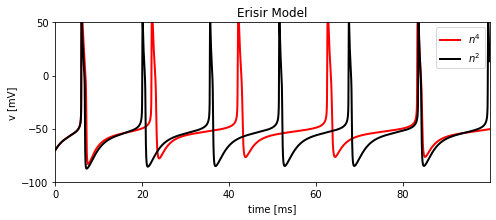

In [87]:
from scipy.integrate import odeint
import numpy as np
from numpy import exp
import pylab as pl

c = 1
g_k = 224.0
g_na = 112
g_l = 0.5
v_k = -90.0
v_na = 60
v_l = -70
i_ext = 7.0
t_final = 100
dt = 0.01


def alpha_h(v):
    return 0.0035 / exp(v / 24.186)
    


def alpha_m(v):
    return 40 * (75.5 - v) / (exp((75.5 - v) / 13.5) - 1)
    


def alpha_n(v):
    return (95 - v) / (exp((95 - v) / 11.8) - 1)


def beta_h(v):
    return - 0.017 * (v + 51.25) / (exp(-(v + 51.25) / 5.2) - 1)


def beta_m(v):
    return 1.2262 / exp(v / 42.248)
    


def beta_n(v):
    return 0.025 / exp(v / 22.222)


def h_inf(v):
    return alpha_h(v) / (alpha_h(v) + beta_h(v))


def m_inf(v):
    return alpha_m(v) / (alpha_m(v) + beta_m(v))


def n_inf(v):
    return alpha_n(v) / (alpha_n(v) + beta_n(v))


def Erisir1(u, t): 
    '''
    define Traub Model with g_k * n**4
    '''
    v, n, h, = u
    m = alpha_m(v) / (alpha_m(v) + beta_m(v))
    dvdt = i_ext - g_na * h * m ** 3 * \
        (v - v_na) - g_k * n ** 4 * (v - v_k) - g_l * (v - v_l)
    dndt = alpha_n(v) * (1.0 - n) - beta_n(v) * n
    dhdt = alpha_h(v) * (1.0 - h) - beta_h(v) * h

    return [dvdt, dndt, dhdt]

def Erisir2(u, t):
    '''
    define Traub Model with g_k*n**2
    '''
    v, n, h, = u
    m = alpha_m(v) / (alpha_m(v) + beta_m(v))
    dvdt = i_ext - g_na * h * m ** 3 * \
        (v - v_na) - g_k * n ** 2 * (v - v_k) - g_l * (v - v_l)
    dndt = alpha_n(v) * (1.0 - n) - beta_n(v) * n
    dhdt = alpha_h(v) * (1.0 - h) - beta_h(v) * h

    return [dvdt, dndt, dhdt]


v = -70.0
# m = m_inf(v)
h = h_inf(v)
n = n_inf(v)
u = [v, n, h]

if __name__ == "__main__":

    t = np.arange(0, t_final, dt)
    sol = odeint(Erisir1, u, t)
    sol_1 = odeint(Erisir2, u, t)
    v = sol[:, 0]
    v_1 = sol_1[:,0]

    I_k = -g_k**(v - v_k)    


    pl.figure(figsize=(7, 3))
    pl.plot(t, v, lw=2, c="red", label = '$n^4$')
    pl.plot(t,v_1, lw=2, c="k", label = '$n^2$')
    pl.xlim(min(t), max(t))
    pl.ylim(-100, 50)
    pl.xlabel("time [ms]")
    pl.ylabel("v [mV]")
    pl.yticks(range(-100, 100, 50))
    pl.tight_layout()
    pl.title('Erisir Model')
    pl.legend()
    pl.show()